In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset
#Using pandas to read csv as a dataframe called train & test.

train = pd.read_csv('Health Insurance Cross Sell Prediction train.csv')
test = pd.read_csv('Health Insurance Cross Sell Prediction test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Visualization

<AxesSubplot:xlabel='Response', ylabel='count'>

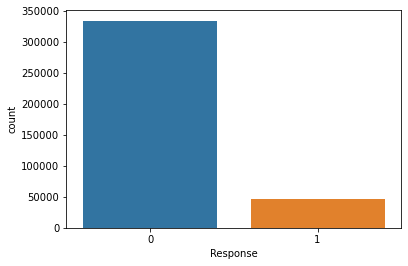

In [7]:
sns.countplot(x='Response', data=train)

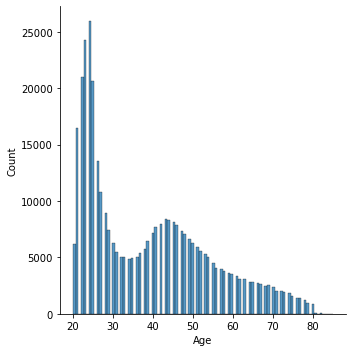

In [8]:
sns.displot(x='Age', data=train)

<AxesSubplot:ylabel='Age'>

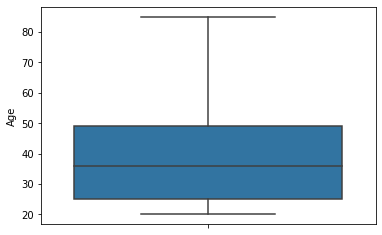

In [9]:
sns.boxplot(y='Age', data=train)

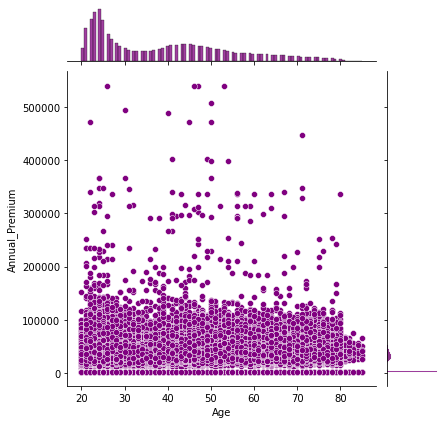

In [10]:
#visualization Age Vs. Annual Premium
sns.jointplot(x='Age', y='Annual_Premium', 
              data=train,color='purple')

In [11]:
#visualization Response Vs. Gender
gen = train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()

In [12]:
gen

,Gender,Response,Count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


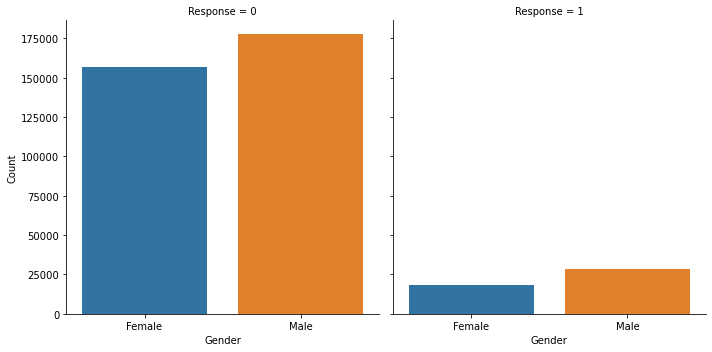

In [13]:
g = sns.catplot(x='Gender', y='Count', col='Response', 
                data=gen, kind='bar');

In [14]:
#Visualization Response Vs. Vehicle Age
veage = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()

In [15]:
veage

,Vehicle_Age,Response,Count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


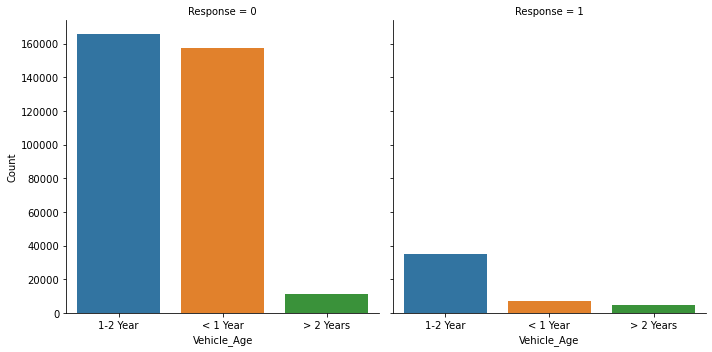

In [16]:
vea = sns.catplot(x="Vehicle_Age", y="Count",col="Response",
                data=veage, kind="bar")

In [17]:
#Visualization Response Vs. Vehicle Damage
ve_damage = train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'Count'}).reset_index()

In [18]:
ve_damage

,Vehicle_Damage,Response,Count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


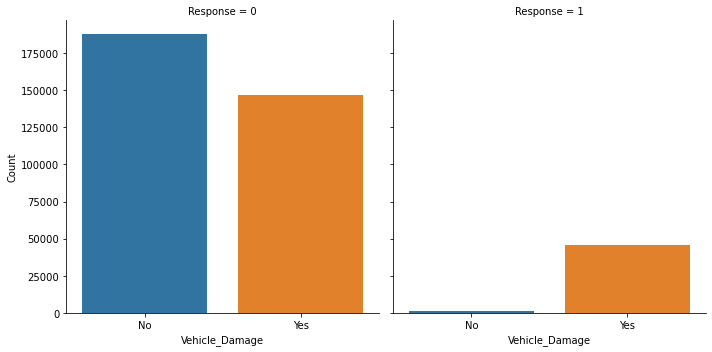

In [19]:
ved = sns.catplot(x="Vehicle_Damage", y="Count",col="Response",
                data=ve_damage, kind="bar")

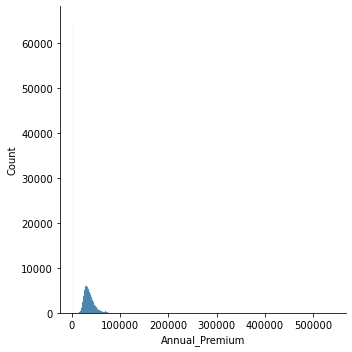

In [20]:
sns.displot(x='Annual_Premium', data=train)

Data Cleaning

In [21]:
train = pd.get_dummies(train, drop_first=True)

In [22]:
train = train.drop('id', axis=1)

In [23]:
test = pd.get_dummies(test, drop_first=True)

In [24]:
test = test.drop('id', axis=1)

In [25]:
train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


Logistic Regression & Coefficients

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop('Response',axis=1)
y = train['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
train['intercept']=1
train_cols = train.drop('Response',axis=1)

#build logistic regression
logit = sm.Logit(train['Response'],train_cols)
output=logit.fit()

Optimization terminated successfully.
         Current function value: 0.274858
         Iterations 11


In [29]:
#coefficient
output_table=pd.DataFrame(dict(coefficients=output.params,SE=output.bse,z=output.tvalues,p_values=output.pvalues))
print(output_table.sort_values('coefficients',ascending=False))

                       coefficients            SE          z       p_values
Vehicle_Damage_Yes         2.028059  3.426569e-02  59.186289   0.000000e+00
Driving_License            1.211306  1.634257e-01   7.411971   1.244359e-13
Vehicle_Age_> 2 Years      0.209228  1.907659e-02  10.967813   5.457640e-28
Gender_Male                0.090692  1.112766e-02   8.150139   3.635055e-16
Annual_Premium             0.000003  2.956420e-07   8.699265   3.340401e-18
Vintage                   -0.000007  6.461443e-05  -0.110921   9.116791e-01
Region_Code               -0.000368  4.356953e-04  -0.843702   3.988359e-01
Policy_Sales_Channel      -0.002441  1.094707e-04 -22.301630  3.562847e-110
Age                       -0.025347  5.456888e-04 -46.449528   0.000000e+00
Vehicle_Age_< 1 Year      -1.172105  1.880180e-02 -62.340018   0.000000e+00
intercept                 -2.897887  1.713783e-01 -16.909298   3.842561e-64
Previously_Insured        -3.972821  8.266899e-02 -48.056970   0.000000e+00


In [30]:
#finding the most important variables
print(output_table.loc[output_table['p_values']<0.05].sort_values('coefficients',ascending=False))

                       coefficients            SE          z       p_values
Vehicle_Damage_Yes         2.028059  3.426569e-02  59.186289   0.000000e+00
Driving_License            1.211306  1.634257e-01   7.411971   1.244359e-13
Vehicle_Age_> 2 Years      0.209228  1.907659e-02  10.967813   5.457640e-28
Gender_Male                0.090692  1.112766e-02   8.150139   3.635055e-16
Annual_Premium             0.000003  2.956420e-07   8.699265   3.340401e-18
Policy_Sales_Channel      -0.002441  1.094707e-04 -22.301630  3.562847e-110
Age                       -0.025347  5.456888e-04 -46.449528   0.000000e+00
Vehicle_Age_< 1 Year      -1.172105  1.880180e-02 -62.340018   0.000000e+00
intercept                 -2.897887  1.713783e-01 -16.909298   3.842561e-64
Previously_Insured        -3.972821  8.266899e-02 -48.056970   0.000000e+00


Random Forest （Base On Kaggle solution)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 


In [32]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [33]:
y_pred=model.predict(X_test)

In [34]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    100386
           1       0.00      0.00      0.00     13947

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



C:\Users\luy10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luy10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luy10\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\luy10\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [36]:
print(confusion_matrix(y_test,y_pred))

[[100386      0]
 [ 13947      0]]


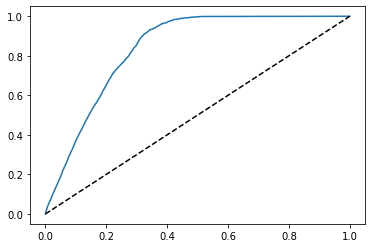

Area under curve (AUC):  0.8379706141135399


In [37]:
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)


plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [38]:
data_dummy = pd.get_dummies(train, drop_first=True)
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)
  
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('Response', axis=1), train['Response'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['Response'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.8639332726383626 
 OOB Confusion Matrix 
         0     1
0  213259  7284
1   26941  4047


<AxesSubplot:>

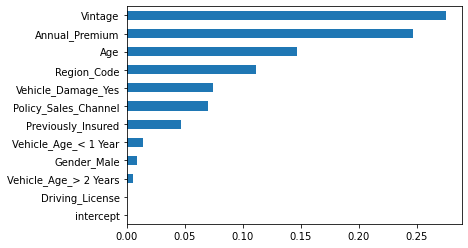

In [39]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('Response', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')


In [40]:
#build the model without Vintage
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(train.drop(['Response', 'Vintage'], axis=1), train['Response'])

#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['Response'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop(['Response', 'Vintage'], axis=1),test['Response']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['Response'], rf.predict(test.drop(['Response', 'Vintage'], axis=1)), labels=[0, 1]))
)

OOB accuracy is 0.8428305059813701 
 OOB Confusion Matrix 
         0      1
0  204696  15847
1   23686   7302
Test accuracy is 0.8435459723101144 
 Test Set Confusion Matrix 
         0     1
0  105563  8293
1   11980  3742


In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['Response', 'Vintage'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()